In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/data"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
train = pd.read_csv(path + "/train_labels.csv")

In [ ]:
train

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1
...,...,...
1303,hxjwafskxmlfaotwaklzuwuccsbxfu.jpg,0
1304,oyodauphffgmzmvqlykcfvmyxartok.jpg,1
1305,uppvtemhkneqggtbfubeccqjvyefiw.png,1
1306,mzjjvzkzvqmyukzsegtoktaslejcdz.jpg,0


In [ ]:
!unzip /content/drive/MyDrive/data/images.zip

Archive:  /content/drive/MyDrive/data/images.zip
   creating: images/
  inflating: images/wiovvusmzmxindaealykgesxwwleql.jpg  
  inflating: images/uxykipqshvpliunxlldynrpskpdzeu.png  
  inflating: images/kpcznzbgvgwliaqhkcrwsusssykqvs.jpg  
  inflating: images/nlhevzkzseaudpnhbawmmufkxnqyni.jpg  
  inflating: images/xssuquzxphcmdrpcrurcedzxwazbmm.jpg  
  inflating: images/stjfpwlmjugoohoeqvaoebagvubysc.jpg  
  inflating: images/louklilbbrpqodurfzvvejxglgocwi.jpg  
  inflating: images/bpwzubqeojttiklnrskmqheackknsn.jpg  
  inflating: images/laaqrylcpzmanpcdilwteiuhetchzt.jpg  
  inflating: images/ljkyoarjjsfzpguocnnmteqqidnztx.jpg  
  inflating: images/itxiomwebnkfodztausaduxyrhgfrv.jpg  
  inflating: images/xqjultlkywteeyuuxvtcfmrwqatbkd.jpg  
  inflating: images/wpyvgvjhybaljtzduconhborbnpcps.jpg  
  inflating: images/rblxyebdxsswuozyyjmdcyuyqjmzcz.jpg  
  inflating: images/sczhdwamqbmpolozkmncxyqtcwcbdd.jpg  
  inflating: images/uzewooxjwzphkroseskteuzyuzjgrr.jpg  
  inflating: image

In [ ]:
from sklearn.model_selection import train_test_split

train_image,val_image,train_label,val_label = train_test_split(train["image"],train["target"],test_size=0.2,random_state=42)

In [ ]:
def read_image(img):
  image = cv2.imread("./images/"+img)
  image = cv2.resize(image,(224,224))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  return image

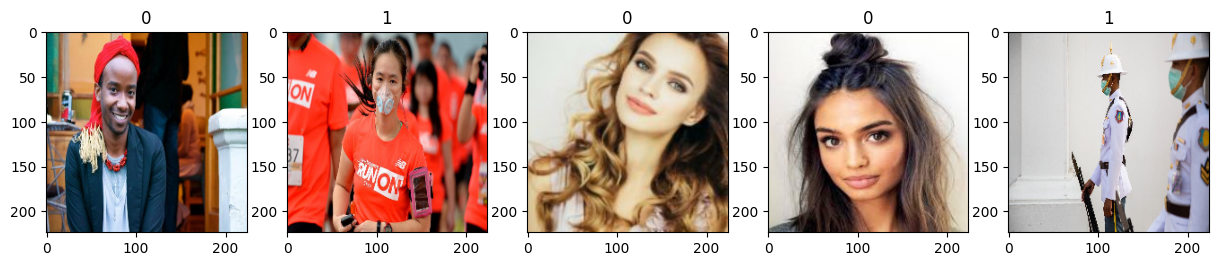

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(15,5))
i = 0
for row in train.iterrows():
  image = read_image(row[1]["image"])
  ax[i].imshow(image.astype("uint8"))
  ax[i].title.set_text(row[1]["target"])
  i+=1
  if i==5:
    break
plt.show()


In [ ]:
train_image = train_image.apply(read_image)
val_image = val_image.apply(read_image)

In [ ]:
train_images = np.array(list(train_image)).reshape(-1,224,224,3)
val_images = np.array(list(val_image)).reshape(-1,224,224,3)

In [ ]:
train_labels = np.array(train_label)
val_labels = np.array(val_label)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
augment = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
x = Input((224,224,3))
x = augment(x)
backbone = EfficientNetB0(include_top=False, weights="imagenet",input_tensor=x)
result = GlobalAveragePooling2D()(backbone.output)
result = Dropout(0.2)(result)
output = Dense(1, activation="sigmoid")(result)

model = Model(x,output,name="my_model")

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(val_images,val_labels),
    epochs=10
)

Epoch 1/10
33/33 [==============================] - 44s 316ms/step - loss: 0.2473 - accuracy: 0.9006 - val_loss: 0.2418 - val_accuracy: 0.9313
Epoch 2/10
33/33 [==============================] - 9s 269ms/step - loss: 0.0540 - accuracy: 0.9799 - val_loss: 0.2739 - val_accuracy: 0.9580
Epoch 3/10
33/33 [==============================] - 9s 273ms/step - loss: 0.0418 - accuracy: 0.9818 - val_loss: 0.9037 - val_accuracy: 0.9046
Epoch 4/10
33/33 [==============================] - 9s 276ms/step - loss: 0.0317 - accuracy: 0.9847 - val_loss: 0.4674 - val_accuracy: 0.9160
Epoch 5/10
33/33 [==============================] - 9s 278ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.2454 - val_accuracy: 0.9466
Epoch 6/10
33/33 [==============================] - 9s 275ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.1938 - val_accuracy: 0.9427
Epoch 7/10
33/33 [==============================] - 9s 270ms/step - loss: 0.0344 - accuracy: 0.9904 - val_loss: 0.2248 - val_accuracy: 0.9656
Epoch

In [ ]:
import os

In [ ]:
images_name = os.listdir("./images")
imgs = [img for img in images_name if not img in train["image"].tolist()]

In [ ]:
test = []
for img in imgs:
  image = cv2.imread("./images/"+img)
  image = cv2.resize(image,(224,224))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  test.append(image)

test = np.array(test)

In [ ]:
test.shape

(509, 224, 224, 3)

In [ ]:
results = model.predict(test)

16/16 [==============================] - 4s 144ms/step


In [ ]:
results = results.flatten()

In [ ]:
results = results.tolist()

In [ ]:
df = pd.DataFrame({"image":imgs,"target":results})

In [ ]:
df.to_csv("submission_mask_9.csv",index=False)

In [ ]:
df

,image,target
0,bvrbztwngoiduyhlrnxnybuqamwdjq.jpg,0
1,cemwpmilmtzyyvpoxxflruiyubdzvc.jpg,0
2,weipwizxckxeagywuilohlxktcrypk.jpg,0
3,phbrlkorxtxgllwntzlgujplyffcdm.jpg,1
4,pbndybjpdykkiinslkpnepifijnsvd.jpg,0
...,...,...
504,mrytehdxapzyymznjhvbvkhutalisi.jpg,0
505,rjcsevtxucgtrcxvvsblkrakusacxq.jpg,0
506,greuliaymizfmfvngfqmrbzayusphp.jpg,0
507,xurcoxcuznkvnyjhrqrtjfnrqqtlby.jpg,0


In [ ]:
from google.colab.patches import cv2_imshow

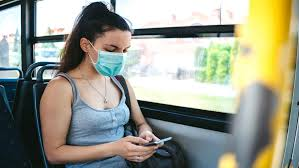

In [ ]:
img = cv2.imread("./images/aelkivmayxgsdjosiibfgmkvfrjvjk.jpg")

cv2_imshow(img)

In [ ]:
train.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1
